# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [1]:
%matplotlib inline

import pandas as pd
import utils

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

# Solution

**Note:** This solution has different results from the offical microsoft solution beacuse they drop outliers in a different way. 

## Cleaning Data

### Missing Values

There are missing values in **DepDel15** column. We can impute the missing values with the **DepDelay** column.

In [2]:
# Missing Data
df_flights.isna().sum(axis = 0)

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [3]:
# Rows with missing data
na_filter = df_flights.DepDel15.isna()
df_flights[na_filter].head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,NaN,945,0,1,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,NaN,1738,0,1,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,NaN,2125,0,1,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,NaN,809,0,1,1
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193,Cincinnati/Northern Kentucky International,Cincinnati,OH,1320,0,NaN,1524,0,1,1


In [4]:
# Fill Missing Values
df_flights.DepDel15 = df_flights.DepDel15.fillna(df_flights.DepDelay[na_filter] > 15)


### Outliers

Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



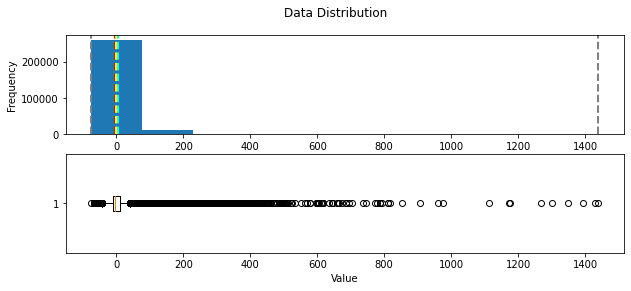

In [5]:
# ArrDelay Distribution
utils.show_distribution(df_flights.ArrDelay)

Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00



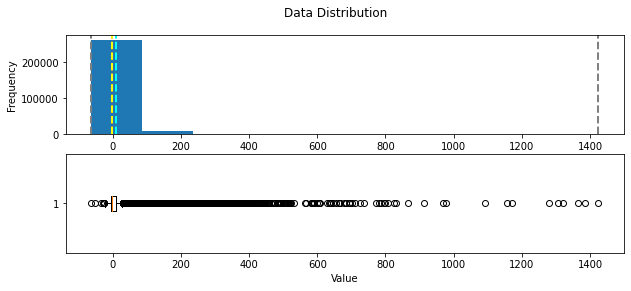

In [6]:
# DepDelay Distribution
utils.show_distribution(df_flights.DepDelay)

In [7]:
# ArrDelay Quantiles
arr_lower_quantile = df_flights.ArrDelay > df_flights.ArrDelay.quantile(0.01)
arr_upper_quantile = df_flights.ArrDelay < df_flights.ArrDelay.quantile(0.90)

# DepDelay Quantiles
dep_lower_quantile = df_flights.DepDelay > df_flights.DepDelay.quantile(0.01)
dep_upper_quantile = df_flights.DepDelay < df_flights.DepDelay.quantile(0.90)

# Drop left 1% percentile and right 99% percentile 
df_flights = df_flights[arr_lower_quantile & arr_upper_quantile & dep_lower_quantile & dep_upper_quantile]

Now the distributions look better.

Minimum:-32.00
Mean:-3.10
Median:-5.00
Mode:0.00
Maximum:37.00



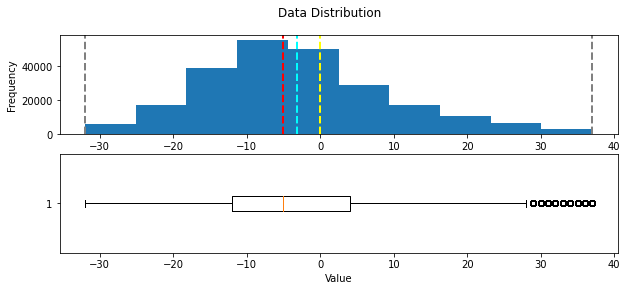

In [8]:
# ArrDelay Distribution
utils.show_distribution(df_flights.ArrDelay)

Minimum:-11.00
Mean:1.29
Median:-1.00
Mode:-3.00
Maximum:36.00



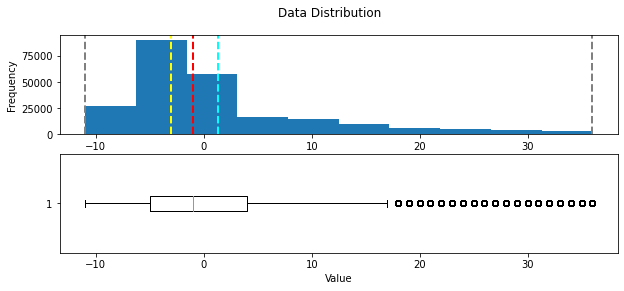

In [9]:
# DepDelay Distribution
utils.show_distribution(df_flights.DepDelay)

## Explore Cleaned Data

### Summary Statistics

In [10]:
# Statistics for Numeric Columns
df_flights.select_dtypes(["int64"]).describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,234802.0,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000
mean,2013.0,7.012951,15.810819,3.902309,12751.998284,12735.984404,1297.782046,1.288417,1479.238690,-3.103666,0.116243,0.012155
std,0.0,1.999885,8.838329,1.993400,1508.571872,1506.084054,469.718843,9.153171,488.477765,12.946277,0.320516,0.109578
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,900.000000,-5.000000,1105.000000,-12.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1255.000000,-1.000000,1500.000000,-5.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1705.000000,4.000000,1900.000000,4.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,36.000000,2359.000000,37.000000,1.000000,1.000000


### Some Questions

#### What are the average (mean) departure and arrival delays?

We expect Aircrafts arrive early and take off a little late.

In [11]:
print("The mean dealay for departure is:{}\nThe mean dealay for arrival is:{}".format(
    df_flights.DepDelay.mean(), df_flights.ArrDelay.mean()
))

The mean dealay for departure is:1.2884174751492747
The mean dealay for arrival is:-3.1036660675803445


#### How do the carriers compare in terms of arrival delay performance?

In terms of mean delay the **F9** is the worst Carrier and **9E** the best.

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='Carrier'>

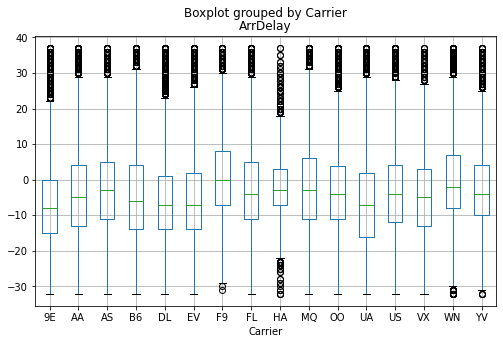

In [12]:
df_flights.boxplot(column = "ArrDelay", by = "Carrier", figsize = (8,5))

In [13]:
df_flights.groupby("Carrier")["ArrDelay"].agg("mean").sort_values(ascending = False)

Carrier
F9    1.312562
WN    0.045423
HA   -1.753950
MQ   -1.967846
FL   -1.998780
YV   -2.469025
OO   -2.750888
AS   -2.779544
US   -2.836717
AA   -3.882760
B6   -3.906673
VX   -3.971063
EV   -4.862082
DL   -5.305459
UA   -5.740674
9E   -6.071124
Name: ArrDelay, dtype: float64

#### Is there a noticable difference in arrival delays for different days of the week?

It is no clear a noticable difference in arrival delays between days of the week but the **sixth day** look the best, with the lowest mean delay.

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DayOfWeek'>

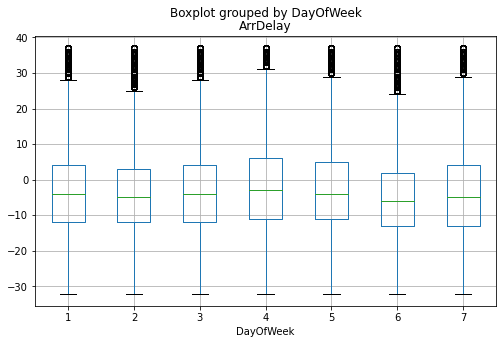

In [14]:
df_flights.boxplot(column = "ArrDelay", by = "DayOfWeek", figsize = (8,5))

#### Which departure airport has the highest average departure delay?

**Chicago Midway International** has the worst performance in terms of average departure delay.

In [15]:
df_flights.groupby("OriginAirportName")["DepDelay"].agg("mean").sort_values(ascending = False)

OriginAirportName
Chicago Midway International                            6.240506
Dallas Love Field                                       4.947875
William P Hobby                                         4.945270
Baltimore/Washington International Thurgood Marshall    3.805278
Denver International                                    3.681906
                                                          ...   
Tucson International                                   -1.372188
Richmond International                                 -1.609312
Kahului Airport                                        -1.852998
Ted Stevens Anchorage International                    -1.955453
Long Beach Airport                                     -2.269333
Name: DepDelay, Length: 70, dtype: float64

#### Do **late** departures tend to result in longer arrival delays than on-time departures?

Yes, in general late departures(1 values in X-axis) have worst performance in arrival delays.

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DepDel15'>

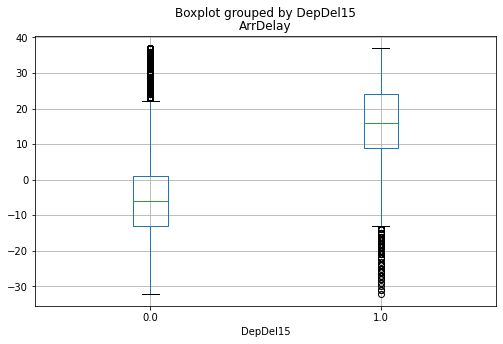

In [16]:
df_flights.boxplot(column = "ArrDelay", by = "DepDel15", figsize = (8,5))

#### Which route (from origin airport to destination airport) has the most **late** arrivals?

The route **San Francisco International -> Los Angeles International** has the most late arrivals. 

In [17]:
df_flights.groupby(["OriginAirportName", "DestAirportName"])["ArrDel15"].agg("sum").sort_values(ascending = False)

OriginAirportName                          DestAirportName                         
San Francisco International                Los Angeles International                   146
Los Angeles International                  San Francisco International                 123
McCarran International                     Los Angeles International                    90
LaGuardia                                  Hartsfield-Jackson Atlanta International     88
Los Angeles International                  McCarran International                       80
                                                                                      ... 
Luis Munoz Marin International             Ronald Reagan Washington National             0
                                           Jacksonville International                    0
                                           Chicago O'Hare International                  0
Tampa International                        Cleveland-Hopkins International               0
Louis 

#### Which route has the highest average arrival delay?

The route **Southwest Florida International -> Theodore Francis Green State** has the highest average arrival delay.

In [18]:
df_flights.groupby(["OriginAirportName", "DestAirportName"])["ArrDelay"].agg("mean").sort_values(ascending = False)

OriginAirportName                          DestAirportName                  
Louis Armstrong New Orleans International  Ronald Reagan Washington National    25.333333
Cleveland-Hopkins International            Palm Beach International             18.000000
Denver International                       Raleigh-Durham International         14.153846
Charlotte Douglas International            General Mitchell International       13.500000
Cleveland-Hopkins International            Philadelphia International           12.800000
                                                                                  ...    
Lambert-St. Louis International            Cleveland-Hopkins International     -20.000000
Jacksonville International                 Chicago Midway International        -20.000000
Eppley Airfield                            LaGuardia                           -20.750000
Denver International                       Kahului Airport                     -22.666667
Indianapolis Internatio